# Capstone Project
Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?
Goal:

Your goal is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir('datasets/')

['dm_office_sales.csv', 'all_sites_scores.csv', 'fandango_scrape.csv']

In [3]:
all_scores = pd.read_csv(os.getcwd() + '/datasets/all_sites_scores.csv')
fandango_scores = pd.read_csv(os.getcwd() + '/datasets/fandango_scrape.csv')

In [4]:
all_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [5]:
fandango_scores.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


# PART 2

In [6]:
fandango_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fandango_scores.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<AxesSubplot: xlabel='RATING', ylabel='VOTES'>

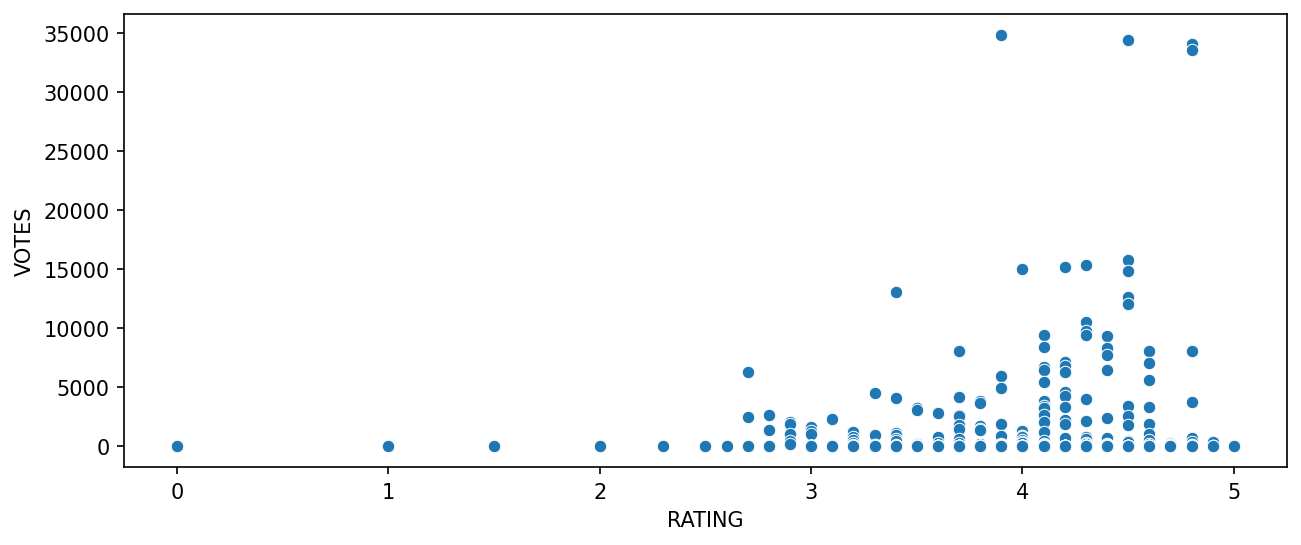

In [8]:
plt.figure(figsize = (10,4), dpi = 150)

sns.scatterplot(data=fandango_scores, x='RATING', y='VOTES')

In [9]:
fandango_scores.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [10]:
def fetch_year(full_name: str):
    words = full_name.split(sep=' ')
    year_with_brackets = words[-1]
    if year_with_brackets[0] == '(':
        year_with_brackets = year_with_brackets[1:]
    if year_with_brackets[-1] == ')':
        year_with_brackets = year_with_brackets[:-1]
    return year_with_brackets

In [11]:
fandango_scores['YEAR'] = fandango_scores['FILM'].apply(np.vectorize(fetch_year))
fandango_scores

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [12]:
fandango_scores['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

In [13]:
yearly_fandango = fandango_scores.groupby('YEAR').count()
yearly_fandango['count'] = yearly_fandango['FILM']
yearly_fandango.drop(['FILM','STARS','RATING','VOTES'], inplace=True, axis=1)
yearly_fandango.reset_index(level='YEAR', inplace=True)
yearly_fandango

,YEAR,count
0,1964,1
1,2012,1
2,2014,23
3,2015,478
4,2016,1


<AxesSubplot: xlabel='YEAR', ylabel='count'>

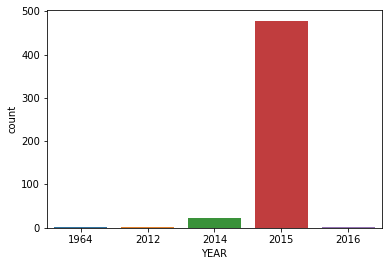

In [14]:
sns.barplot(yearly_fandango, x='YEAR',y='count')

In [15]:
fandango_scores.sort_values('VOTES',ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [16]:
len(fandango_scores[fandango_scores['VOTES'] == 0])

69

In [17]:
fandango_scores = fandango_scores[fandango_scores['VOTES'] != 0]
fandango_scores

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


In [18]:
len(fandango_scores[fandango_scores['VOTES'] == 0])

0

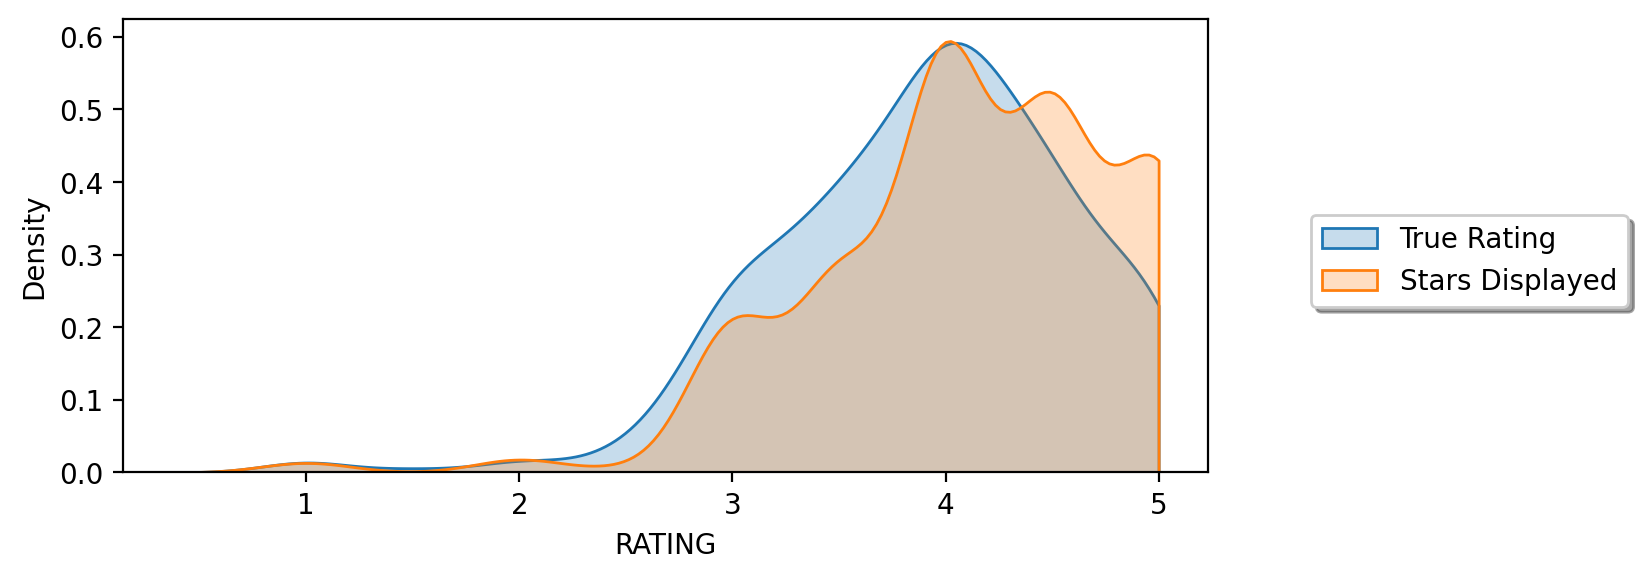

In [19]:
plt.figure(figsize=(7,3), dpi = 200)
sns.kdeplot(data=fandango_scores,x='RATING',clip=(0,5),fill=True)
sns.kdeplot(data=fandango_scores,x='STARS',clip=(0,5),fill=True,)
plt.legend(['True Rating', 'Stars Displayed'],
           bbox_to_anchor=(1.4,0.6),shadow=True)

# OR 
# plt.legend(['True Rating', 'Stars Displayed'], loc=( 1.05,0.5)

In [20]:
fandango_scores['RATING_DIFF'] = (fandango_scores['STARS'] - fandango_scores['RATING']).round(2)
fandango_scores

/tmp/ipykernel_40262/2322407866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_scores['RATING_DIFF'] = (fandango_scores['STARS'] - fandango_scores['RATING']).round(2)


,FILM,STARS,RATING,VOTES,YEAR,RATING_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot: xlabel='RATING_DIFF', ylabel='count'>

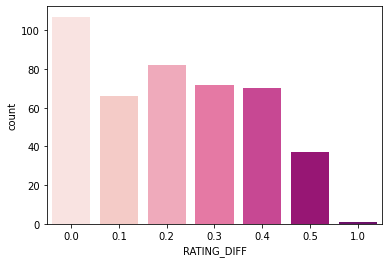

In [21]:
sns.countplot(data=fandango_scores,x='RATING_DIFF',orient="V",palette='RdPu')

In [22]:
fandango_scores[fandango_scores['RATING_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,RATING_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [23]:
all_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [24]:
all_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [25]:
all_scores.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


# Rotten Tomatoes

(0.0, 97.7)

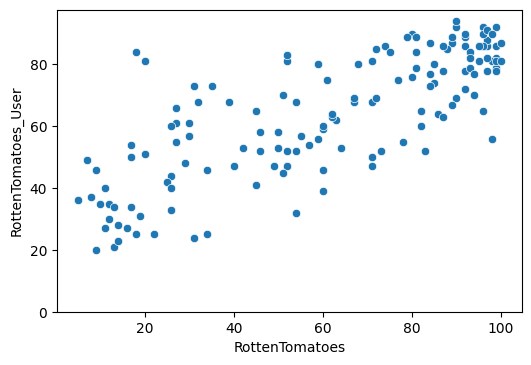

In [26]:
fig = plt.figure(dpi=100)

s = sns.scatterplot(x=all_scores['RottenTomatoes'],y=all_scores['RottenTomatoes_User'],data=all_scores)
s.axes.set_ylim(0,)

In [27]:
all_scores['Rotten_Diff'] = np.vectorize(lambda critics,user: critics - user)(
    all_scores['RottenTomatoes'], all_scores['RottenTomatoes_User'])
all_scores.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


## Mean absolute difference between RT User reviews and RT reviews

In [28]:
all_scores['Rotten_Diff_Abs'] = np.vectorize(lambda n: abs(n))(all_scores['Rotten_Diff'])
all_scores['Rotten_Diff_Abs'].mean()

# OR: all_scores['Rotten_Diff'].apply(abs).mean()

15.095890410958905

<AxesSubplot: title={'center': 'RT Critics Score minus RT User Score'}, xlabel='Rotten_Diff', ylabel='Count'>

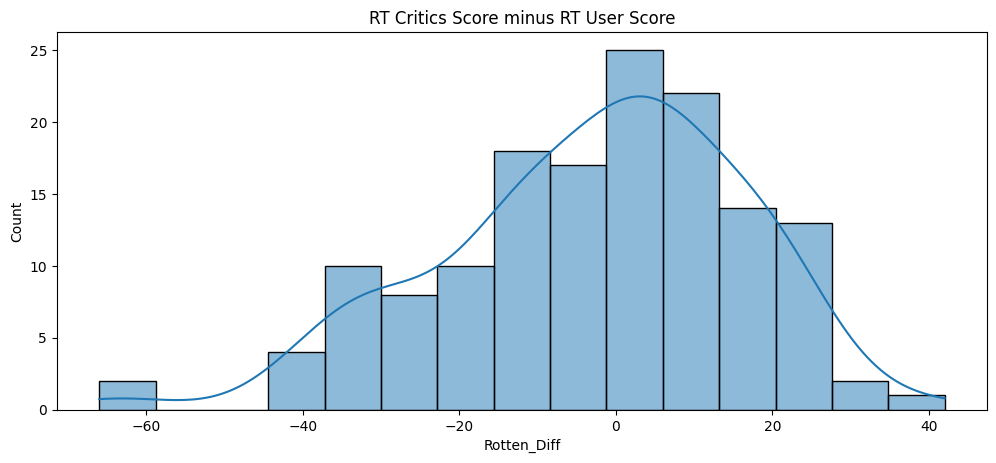

In [29]:
plt.figure(dpi=100, figsize=(12,5))
plt.title('RT Critics Score minus RT User Score')

sns.histplot(x='Rotten_Diff', data=all_scores, bins=15, kde=True)

<AxesSubplot: title={'center': 'RT Critics Score, RT User Score - Absolute Difference'}, xlabel='Rotten_Diff_Abs', ylabel='Count'>

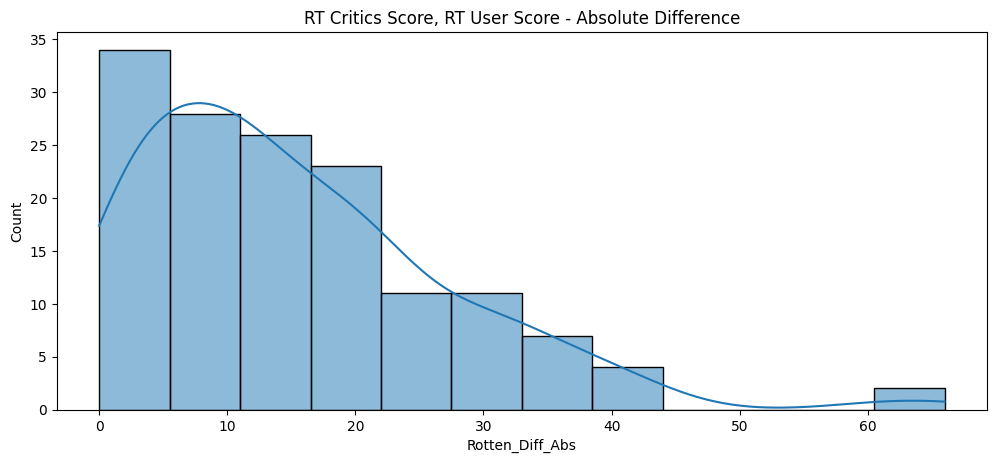

In [30]:
plt.figure(dpi=100, figsize=(12,5))
plt.title('RT Critics Score, RT User Score - Absolute Difference')
sns.histplot(x='Rotten_Diff_Abs',data=all_scores,kde=True)

#  Most controversial films on RT

In [31]:
all_scores[all_scores['Rotten_Diff_Abs'] > 50]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61,61


# What are the top 5 films that users rated higher than critics on RT  (on average)

In [32]:
all_scores[['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff', ascending=True) \
.head(5)

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


# What are the top 5 films that critics rated higher than users on RT  (on average)

In [33]:
all_scores[['FILM', 'Rotten_Diff']].sort_values('Rotten_Diff', ascending=False) \
.head(5)

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


# Metacritic

(0.0, 100.0)

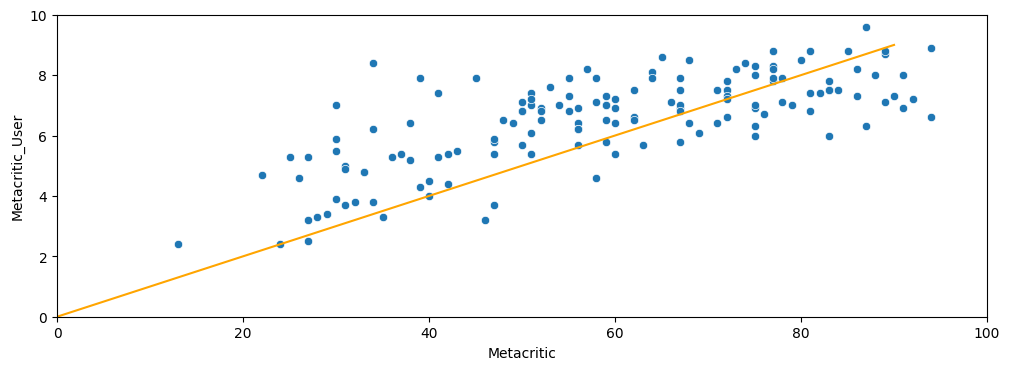

In [34]:
fig = plt.figure(figsize=(12,4), dpi = 100)


ints_x = np.arange(0,100,10)
ints_y = ints_x / 10

plot1 = sns.scatterplot(x=all_scores['Metacritic'],y=all_scores['Metacritic_User'],data=all_scores)
plot2 = sns.lineplot(x=ints_x,y=ints_y,color='orange')

plot1.axes.set_ylim(0,10)
plot2.axes.set_ylim(0,10)

plot1.axes.set_xlim(0,100)
plot2.axes.set_xlim(0,100)

# Analyze most popular films on IMDB and Metacritic

<AxesSubplot: xlabel='IMDB_user_vote_count', ylabel='Metacritic_user_vote_count'>

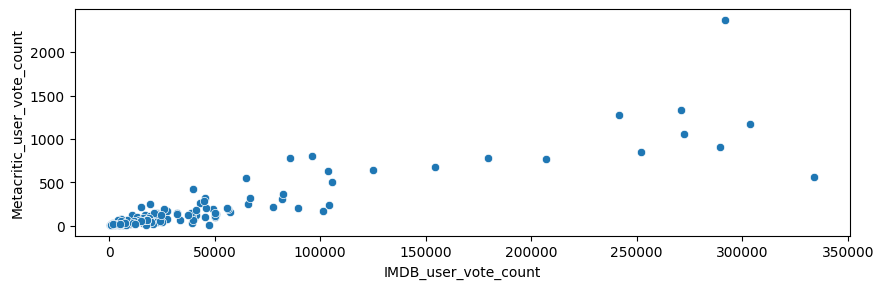

In [35]:
fig = plt.figure(dpi=100, figsize=(10,3))
sns.scatterplot(x=all_scores['IMDB_user_vote_count'],y=all_scores['Metacritic_user_vote_count'],data=all_scores)

In [36]:
all_scores[(all_scores['IMDB_user_vote_count'] > 200000) & (all_scores['Metacritic_user_vote_count'] > 2000)]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


In [37]:
all_scores[(all_scores['IMDB_user_vote_count'] > 300000) & (all_scores['Metacritic_user_vote_count'] < 1000)]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [38]:
all_scores = pd.merge(fandango_scores,all_scores,how='inner',on='FILM')
all_scores.head()

,FILM,STARS,RATING,VOTES,YEAR,RATING_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,8


In [39]:
all_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RATING_DIFF                 145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_Diff                 145 non

In [40]:
all_scores.describe()

,STARS,RATING,VOTES,RATING_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.841379,3817.696552,0.244828,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069,15.186207
std,0.541169,0.502437,6368.668671,0.152721,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488,12.106579
min,3.000000,2.700000,35.000000,0.000000,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000,0.000000
25%,3.500000,3.500000,218.000000,0.100000,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000,6.000000
50%,4.000000,3.900000,1430.000000,0.200000,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000,12.000000
75%,4.500000,4.200000,4279.000000,0.400000,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000,21.000000
max,5.000000,4.800000,34846.000000,0.500000,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000,42.000000,66.000000


In [41]:
review_cols_100 = ['RottenTomatoes','RottenTomatoes_User','Metacritic']
review_cols_10 = ['Metacritic_User','IMDB']

all_scores[review_cols_100] = all_scores[review_cols_100].apply(lambda n: n / 20)
all_scores[review_cols_10] = all_scores[review_cols_10].apply(lambda n: n / 2)
all_scores = all_scores.drop(columns=['VOTES', 'YEAR','RATING_DIFF', 'Metacritic_user_vote_count', 'IMDB_user_vote_count','Rotten_Diff','Rotten_Diff_Abs'])


In [42]:
all_scores.sort_values(by='IMDB', ascending=True).head()

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
28,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
63,The Gallows (2015),3.0,2.9,0.80,1.35,1.50,3.50,2.20
109,The Vatican Tapes (2015),3.0,2.9,0.65,1.05,1.85,2.70,2.30


In [43]:
all_scores = all_scores.rename(columns={'RATING': 'Fandango_Score', 'STARS': 'Fandango_Stars'})

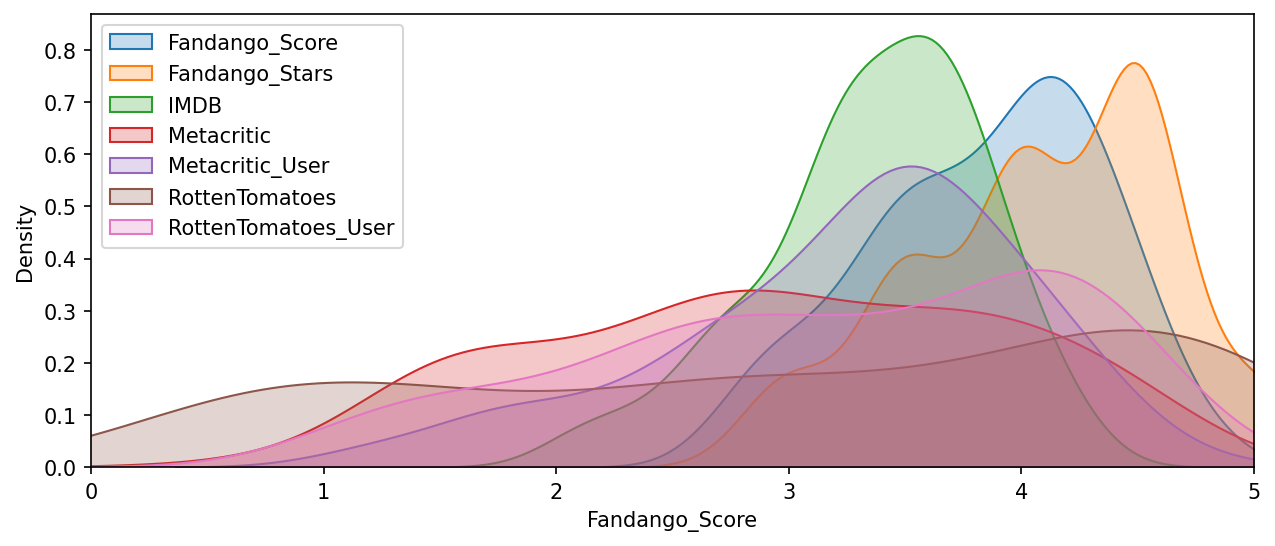

In [44]:
plt.figure(figsize=(10,4), dpi=150)
for col in all_scores.columns.difference(['FILM']):
    kde = sns.kdeplot(x=all_scores[col] ,data=all_scores, label=col,fill=True)
    kde.axes.set_xlim(0,5)
plt.legend(loc='upper left')

[Text(0.5, 0, '')]

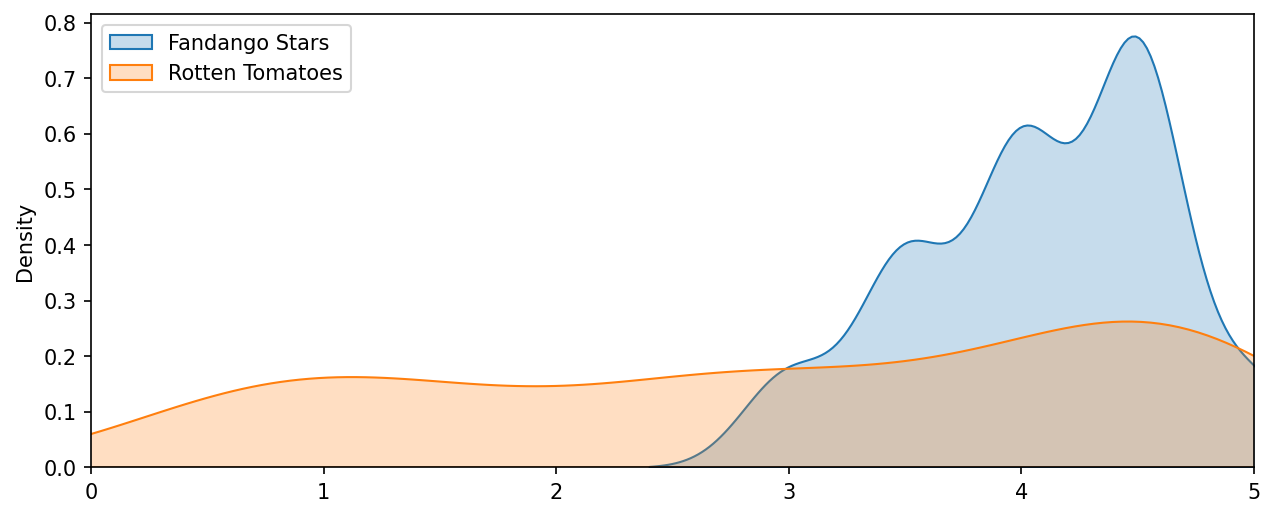

In [45]:
plt.figure(figsize=(10,4), dpi=150)
kde = sns.kdeplot(x='Fandango_Stars', data=all_scores, label='Fandango Stars',fill=True)
sns.kdeplot(x='RottenTomatoes', data=all_scores, label='Rotten Tomatoes',fill=True)

plt.xlim(0,5)
plt.legend(loc='upper left')
kde.set(xlabel='')

<AxesSubplot: ylabel='Count'>

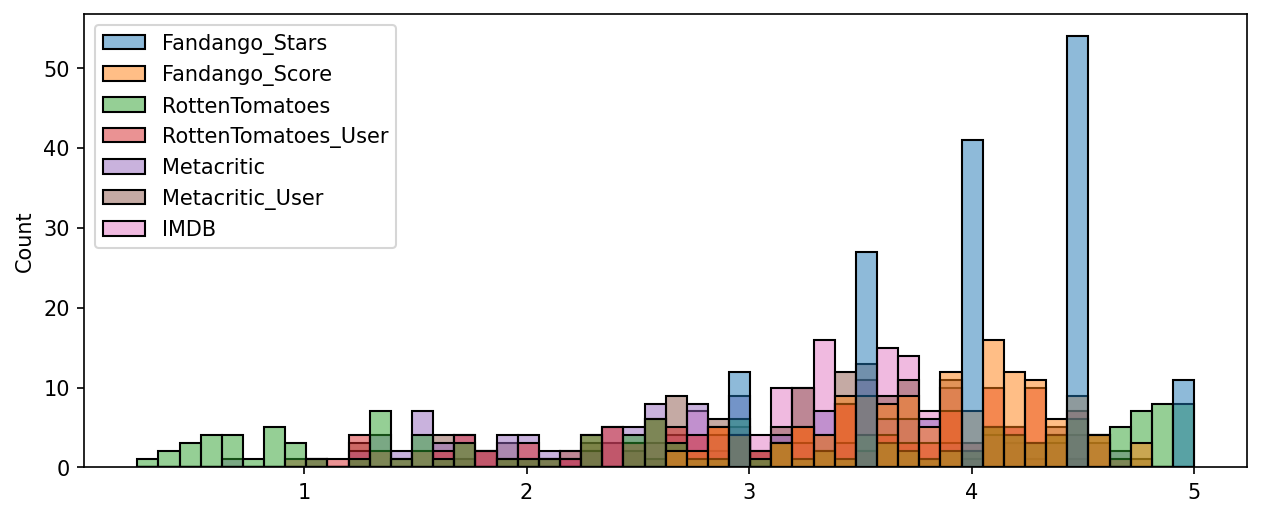

In [46]:
plt.figure(figsize=(10,4), dpi=150)
sns.histplot(data=all_scores, bins=50)

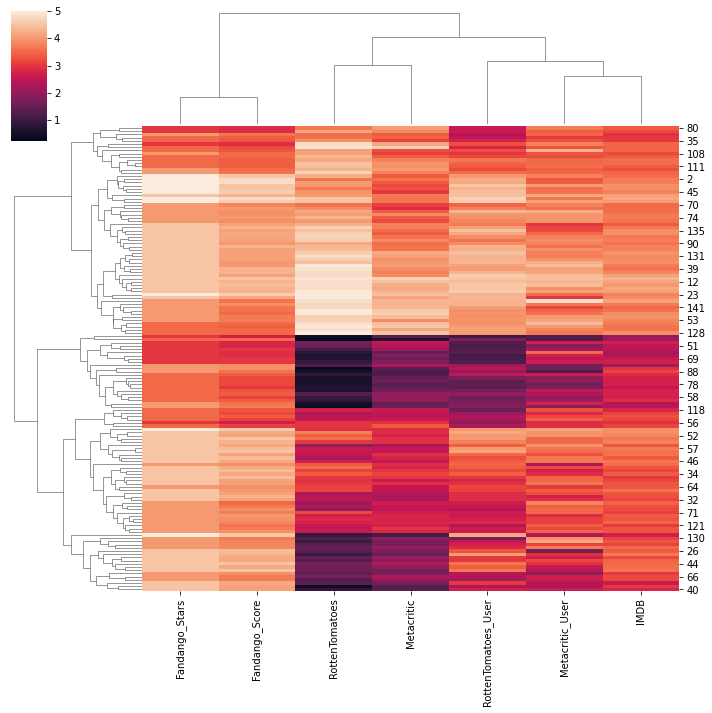

In [47]:
all_scores_no_names = all_scores.drop(columns=['FILM'])

sns.clustermap(data=all_scores_no_names)

In [48]:
top_10_worst = all_scores.sort_values(by='RottenTomatoes',ascending=True).head(10)
top_10_worst

,FILM,Fandango_Stars,Fandango_Score,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.65,1.20,2.15
84,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.40,1.65,2.95
54,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.55,1.85,2.45
25,Taken 3 (2015),4.5,4.1,0.45,2.30,1.30,2.30,3.05
28,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.35,1.25,2.00
50,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.50,2.75,2.30
88,The Loft (2015),4.0,3.6,0.55,2.00,1.20,1.20,3.15
87,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.60,1.90,2.70
78,Mortdecai (2015),3.5,3.2,0.60,1.50,1.35,1.60,2.75
77,Seventh Son (2015),3.5,3.2,0.60,1.75,1.50,1.95,2.75


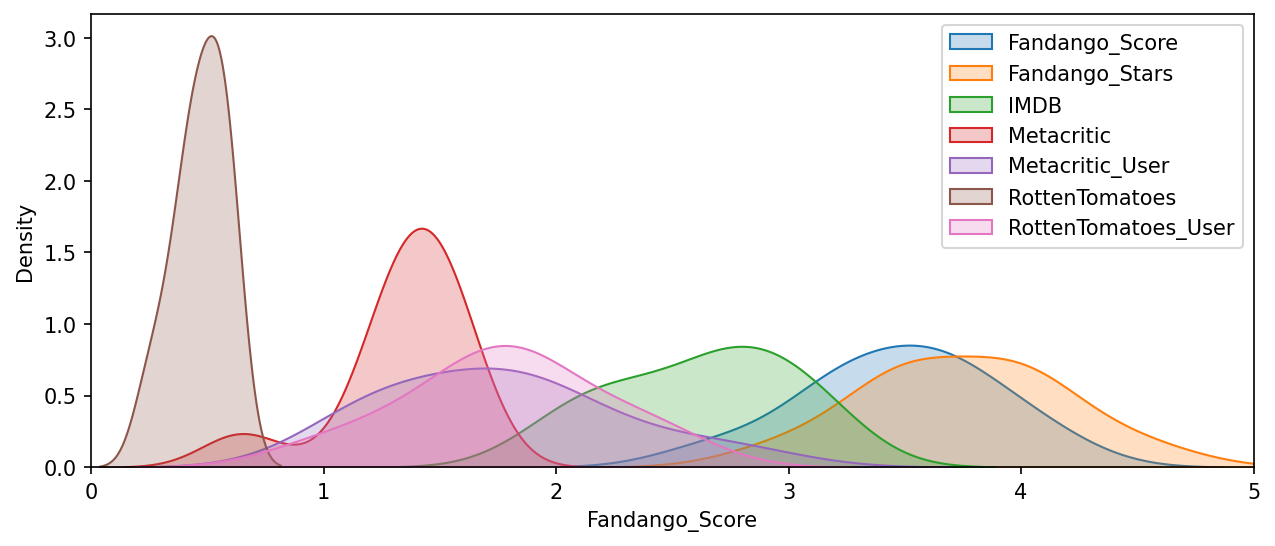

In [49]:
plt.figure(figsize=(10,4),dpi=150)

for col in top_10_worst.columns.difference(['FILM']):
    s = sns.kdeplot(x = col,data=top_10_worst,label=col,fill=True)
    
s.set_label('')
plt.xlim(0,5)
plt.legend()

In [50]:
top_10_worst[top_10_worst['FILM'] == 'Taken 3 (2015)']

,FILM,Fandango_Stars,Fandango_Score,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
25,Taken 3 (2015),4.5,4.1,0.45,2.3,1.3,2.3,3.05


In [51]:
(0.45+2.3+1.3+2.3+3.05)

9.399999999999999

#### Average score for Taken 3 on other websites is equal to only 1.8, while Fandango scores it 4.5

In [52]:
9.399999999999999 / 5

1.8799999999999997